# Report - Relationship between Specific Pollution Types and Population


# **Title:** Relationship between Specific Pollution Types and Population
**Author:** [Vinay Chavada]  
**Date:** [7th January 2024]

---


## Data Exploration

### Import Packages

In [8]:
import pandas as pd
import subprocess
import os
import matplotlib.pyplot as plt
from sqlalchemy import create_engine


---

## Load Data
### Connect to the SQLite database and load the data for CO2 emissions and population.

In [9]:
# If database doesn't exist, run datapipeline to create it.
if not os.path.exists("../data/data.sqlite"):
    subprocess.run(["python", "../project/pipeline.py"])

# Load data from database
con = create_engine('sqlite:///../data/data.sqlite')
emission_df = pd.read_sql_table('co2_emission_data', con)
population_df = pd.read_sql_table('population_data', con)

In [10]:
# Recent Year
most_recent_year = 2020

---

## Prepare Data for Analysis

In [11]:
# Filter population data for the year 2020
population_2020 = population_df[population_df['Year'] == 2020]

# Filter emission data for the year 2020
emission_2020 = emission_df[emission_df['Year'] == 2020]

# Identify top 20 countries by population for the year 2020
top_20_population_countries = population_2020.sort_values(by='Population', ascending=False).head(20)

# Identify top 20 countries by total emissions for the year 2020
top_20_emission_countries = emission_2020.sort_values(by='Total', ascending=False).head(20)

# Merge the top 20 countries based on both population and emissions for the year 2020
merged_df = pd.merge(top_20_population_countries, top_20_emission_countries, on='Country', how='inner')

---

## Table of Contents

1. [Introduction](#introduction)
2. [Data Overview](#data-overview)
3. [Analysis](#analysis)
4. [Conclusion](#conclusion)

---

## 1. Introduction

### Motivation
With the increasing concern over climate change and its global impacts, understanding the relationship between CO2 emissions, population, and their environmental impact is crucial. This report seeks to explore these relationships using data from various countries for the year 2020.

In recent times, pollution has become a pressing concern, escalating at an alarming rate. Many across the globe believe that the rapid increase in pollution can be attributed to the burgeoning population. This perspective posits that as countries experience population growth, there is a subsequent surge in various forms of pollution, stemming from increased industrialization, transportation needs, and consumption patterns.

In this report, we embark on an analytical journey to juxtapose the world's population data with the pollution statistics of various countries. By conducting a comparative analysis, we aim to discern if there exists a tangible correlation between population size and the magnitude of pollution

### Goal
The primary goal is to analyze and visualize the relationships between:

1. Top countries by emissions.
2. Top countries by population.
3. The overlap between the top countries by CO2 emissions and population.
4. The environmental implications of countries with high emissions and population.

---

## 2. Data Overview

### Data Sources:

#### 1. Population Data
- **Metadata URL:** [Kaggle - World Population Dataset](https://www.kaggle.com/)
- **Data URL:** [World Population Dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset?select=world_population.csv)
- **Data Type:** CSV

#### 2. Country-wise Emission Data
- **Metadata URL:** [Kaggle - Global Fossil CO2 Emissions by Country](https://www.kaggle.com/)
- **Data URL:** [Global Fossil CO2 Emissions Dataset](https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022/data?select=GCB2022v27_MtCO2_flat.csv)
- **Data Type:** CSV

### Overview:

The dataset contains information on various types of pollution, including:

- **Total Pollution**
- **Coal Emissions**
- **Oil Emissions**
- **Gas Emissions**
- **Cement Production Emissions**
- **Flaring Emissions**
- **Other Sources of Pollution**

These datasets, sourced from Kaggle, provide a comprehensive view of population statistics and country-wise emissions. The analysis will focus on exploring the relationship between population size and pollution levels, considering different types of emissions. By examining these datasets, the report aims to contribute insights into the complex interplay between population dynamics and environmental impact.

---

## 3. Analysis
### Visualizations

## Analysis of Top Emission Countries
### To better understand the global emission landscape, we first focused on the year 2020, a pivotal year in environmental discussions and policies. By leveraging our datasets, we identified the countries with the highest emissions for this specific year.

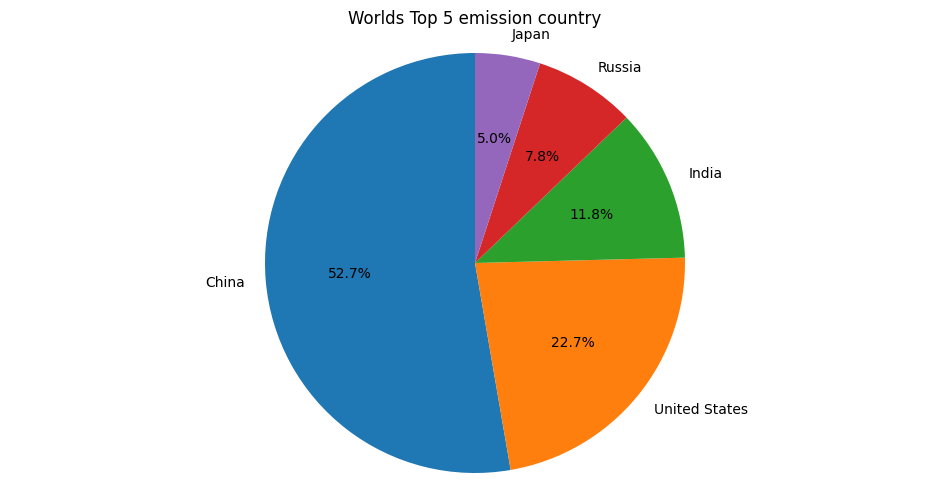

In [12]:
top_5_countries_by_emission = emission_2020.sort_values(by='Total', ascending=False).head(5)
# Create a pie chart
plt.figure(figsize=(12, 6))
plt.pie(top_5_countries_by_emission['Total'], labels=top_5_countries_by_emission['Country'], autopct='%1.1f%%',
        startangle=90)
plt.title('Worlds Top 5 emission country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Top 5 Countries with High Emissions in 2020:

1. China (52.7%)
2. United States (22.7%)
3. India (11.8%)
4. Russia (7.8%)
5. Japan (5.0%)

### This ranking provides a snapshot of the nations that contributed significantly to global emissions in 2020. As we delve deeper into our analysis, these countries will serve as focal points for further examination and discussion.

---


## Area-wise Top 5 Pollution Countries by Category
#### After examining the overall emissions landscape, it's crucial to understand the specific sectors that significantly contribute to pollution. By categorizing emissions into distinct areas such as Coal, Oil, Gas, Cement, Flaring, and Total emissions, we can gain deeper insights into the sources and patterns of pollution.

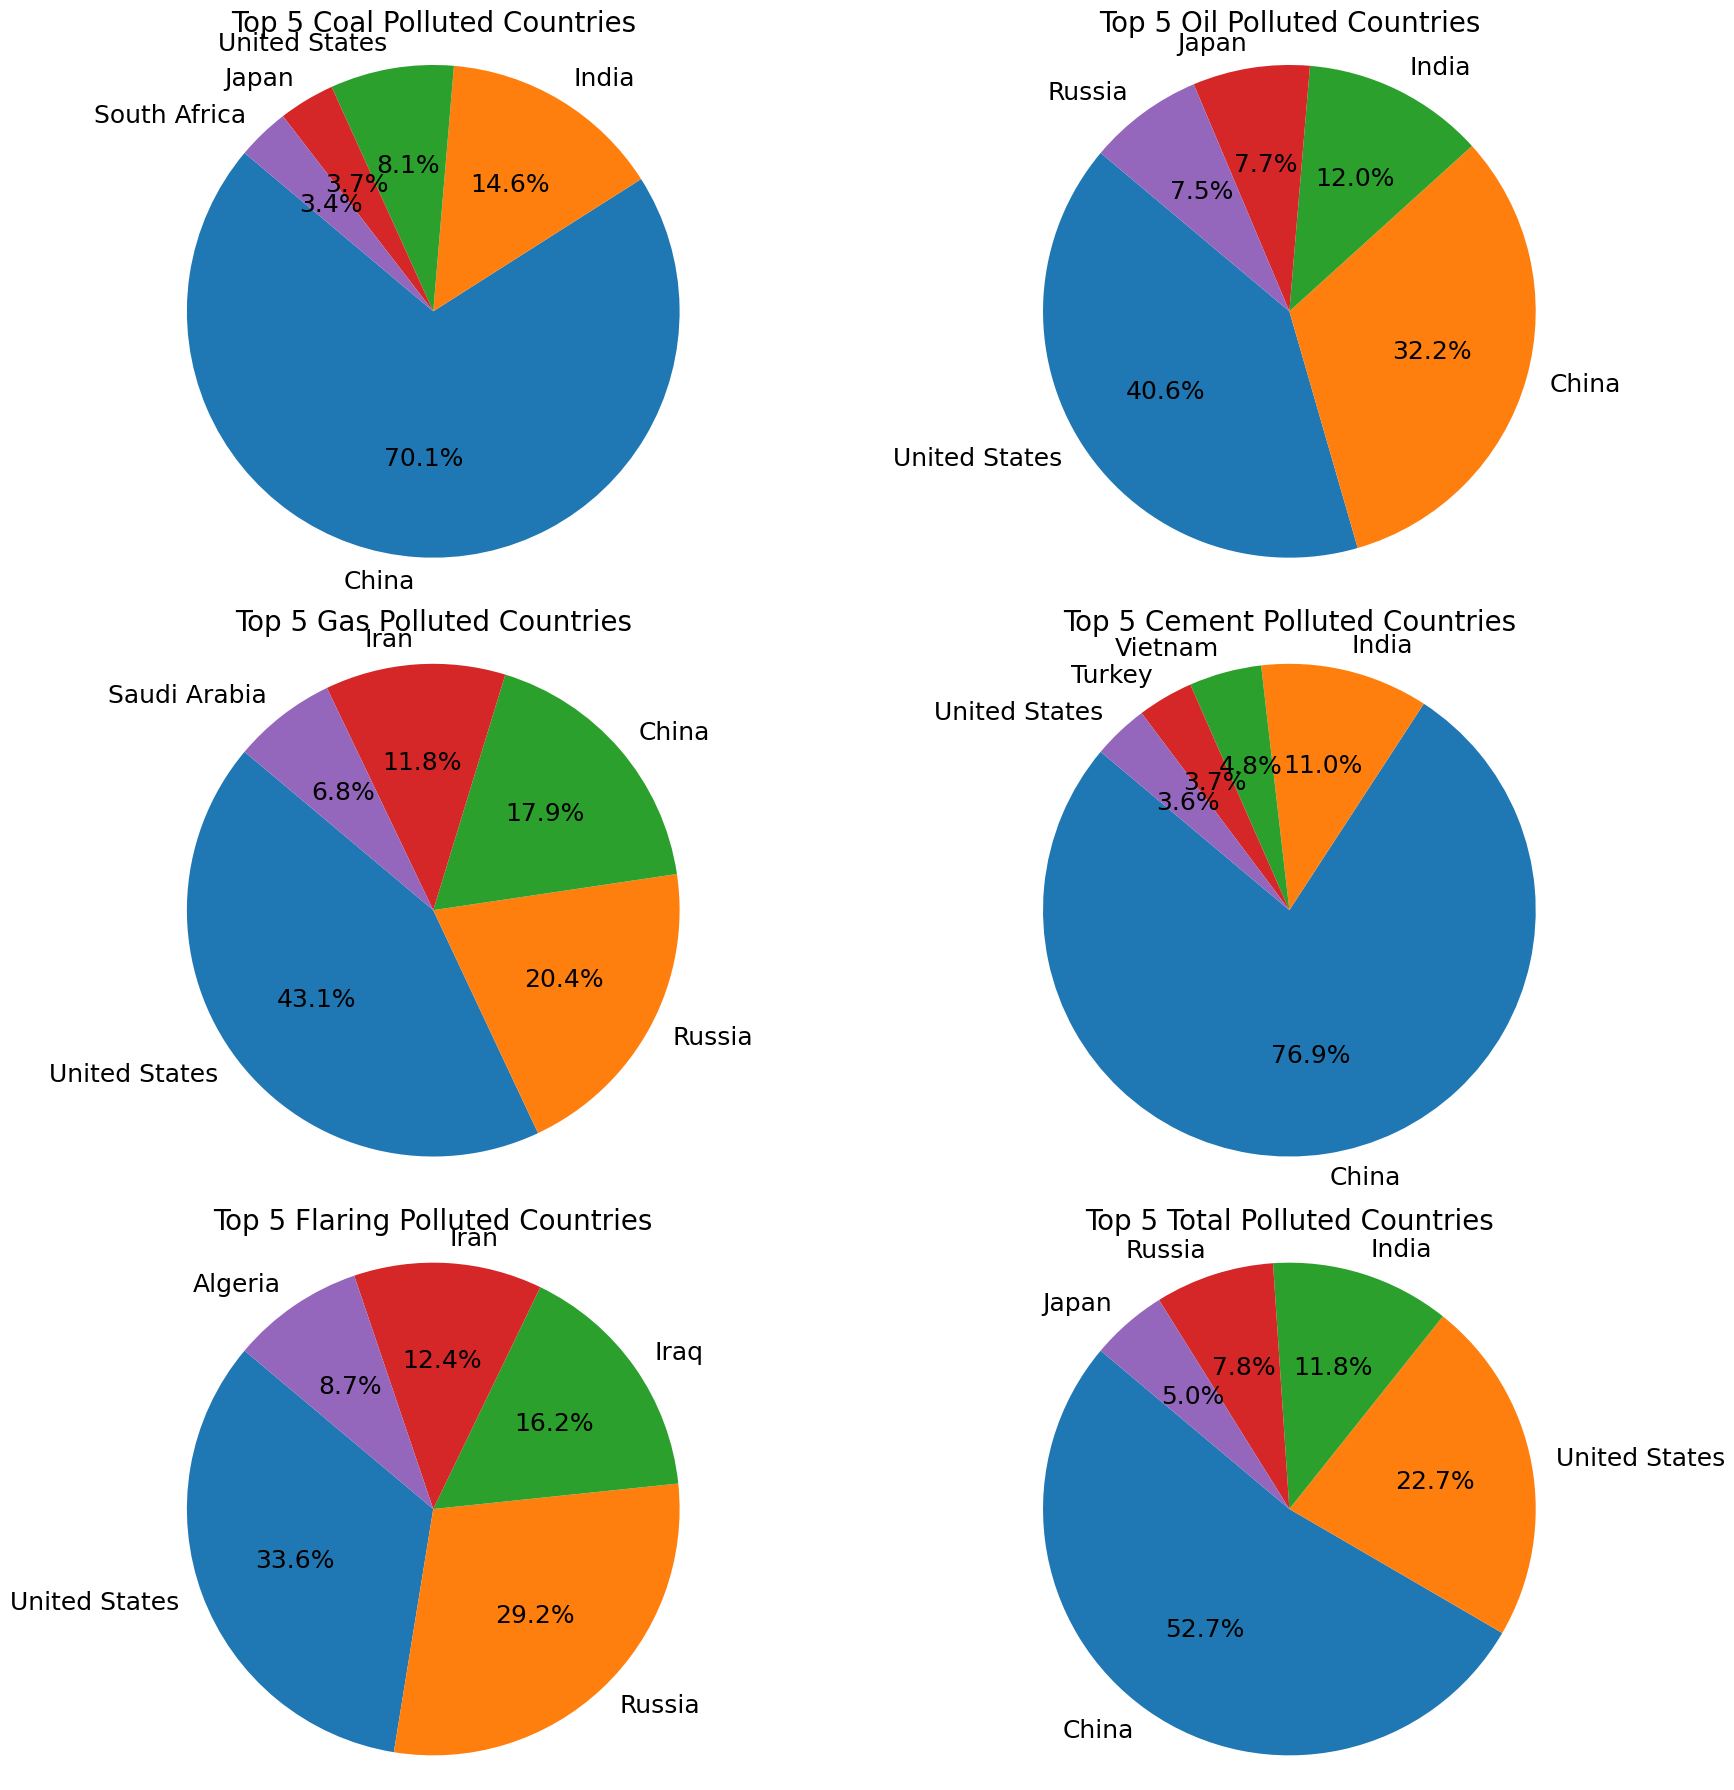

In [13]:
# Define the figure and axis grid for subplots
fig, axs = plt.subplots(3, 2, figsize=(18, 18))

# Flatten the axs array to iterate through subplots easily
axs = axs.flatten()

# Categories and titles for the pie charts
categories = [
    ('Coal', 'Top 5 Coal Polluted Countries'),
    ('Oil', 'Top 5 Oil Polluted Countries'),
    ('Gas', 'Top 5 Gas Polluted Countries'),
    ('Cement', 'Top 5 Cement Polluted Countries'),
    ('Flaring', 'Top 5 Flaring Polluted Countries'),
    ('Total', 'Top 5 Total Polluted Countries')
]

# Plotting pie charts for each category
for i, (category, title) in enumerate(categories):
    # Extract data for the top 5 countries in the given category
    top_5_data = emission_2020.sort_values(by=category, ascending=False).head(5)
    
    # Create the pie chart
    axs[i].pie(top_5_data[category], 
               labels=top_5_data['Country'], 
               autopct='%1.1f%%', 
               startangle=140, 
               textprops={'fontsize': 18})
    
    # Set title for the subplot
    axs[i].set_title(title, fontsize=20)
    
    # Ensure the pie chart is circular
    axs[i].axis('equal')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

## Analysis and Conclusions on Sector-Specific Pollution:

### Coal Emissions:
- **Analysis:**
  - Dominance of China due to heavy reliance on coal.
  - India and the United States follow due to energy demands.
- **Conclusion:** 
  - Challenges in transitioning away from coal without compromising energy security.

### Oil Emissions:
- **Analysis:**
  - United States influenced by vast transportation sector.
  - China and India exhibit high emissions due to growing economies.
- **Conclusion:** 
  - Advancements in electric vehicles and renewable energy sources are needed.

### Gas Emissions:
- **Analysis:**
  - United States relies on natural gas for various processes.
  - Russia and China driven by energy demands and reserves.
- **Conclusion:** 
  - Energy efficiency and renewable energy sources are essential.

### Cement Emissions:
- **Analysis:**
  - China's dominance due to booming construction sector.
  - India and Vietnam indicate similar development trajectories.
- **Conclusion:** 
  - Innovations in low-carbon cement and sustainable practices are vital.

### Flaring Emissions:
- **Analysis:**
  - United States and Russia lead due to oil and gas practices.
  - Other countries feature due to infrastructural challenges.
- **Conclusion:** 
  - Investments in infrastructure and regulations are required.

### Total Emissions:
- **Analysis:**
  - China's lead underscores its position as a major energy consumer.
  - United States and India highlight challenges in balancing growth with sustainability.
- **Conclusion:** 
  - Multifaceted approach involving policy, technology, and collaboration is crucial.


## Population Analysis

# Visualize the top 5 countries by population in 2020.

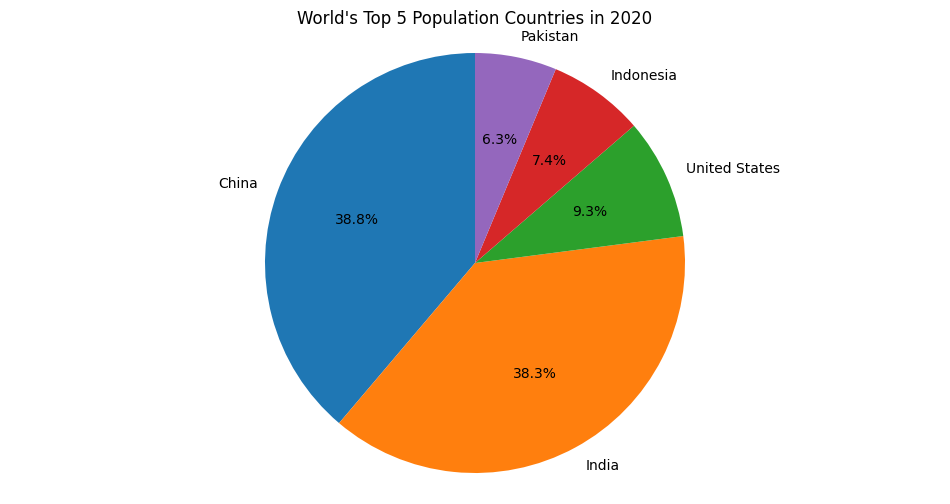

In [14]:
# Sort the population data for the year 2020 in descending order and select the top 5 countries
top_5_countries_by_population = population_2020.sort_values(by='Population', ascending=False).head(5)

# Create a pie chart to visualize the population distribution of the top 5 countries
plt.figure(figsize=(12, 6))
plt.pie(top_5_countries_by_population['Population'], 
        labels=top_5_countries_by_population['Country'], 
        autopct='%1.1f%%',  # Display percentage on the pie chart
        startangle=90)      # Start the pie chart at 90 degrees (North)

plt.title('World\'s Top 5 Population Countries in 2020')
plt.axis('equal')  # Ensures the pie chart is drawn as a circle

plt.show()


### Analysis of Polluted Countries vs. Population

#### Overview:

The provided data presents an insightful comparison between the top countries contributing to various types of pollution and their respective population percentages. Below is a comprehensive analysis based on the results:

---

#### Coal Pollution:

- **China**: Notably, China stands out as the leading contributor to coal pollution with a staggering 70.1%. Given its industrial growth and heavy reliance on coal for energy, this figure aligns with its developmental trajectory.
  
- **India**: With 14.6%, India follows China. Both nations, with a combined population percentage of 77.1%, account for a significant chunk of global coal pollution.

- **United States & Japan**: These countries, although smaller contributors to coal pollution, still have a noticeable impact. Japan, for instance, with 3.7%, suggests a certain level of industrial activity.

---

#### Oil Pollution:

- **United States**: Leading in oil pollution with 40.6%, the U.S.'s industrial might and vehicular dependency could be contributing factors.
  
- **China & India**: The world's two most populous countries are also significant contributors to oil pollution, collectively accounting for 44.2%.

- **Russia & Japan**: These nations further highlight the global spread of oil consumption and its associated pollution.

---

#### Gas Pollution:

- **United States**: Dominating the gas pollution landscape with 43.1%, the U.S.'s industrial and domestic consumption patterns likely play a role.
  
- **Russia & China**: These countries, known for their expansive territories and energy needs, follow closely.

- **Iran & Saudi Arabia**: Their presence in this list indicates the significant role of the Middle East in gas consumption and production.

---

#### Cement Pollution:

- **China**: The leader in cement pollution at 76.9%, China's infrastructure and construction boom can be attributed to this figure.
  
- **India & Vietnam**: These countries, undergoing rapid urbanization, also have substantial cement consumption for infrastructural development.

---

#### Flaring Pollution:

- **United States & Russia**: Topping the list, these countries likely have extensive oil and gas extraction operations, leading to substantial flaring.
  
- **Iraq, Iran & Algeria**: These countries further emphasize the challenges faced in the Middle East and North Africa region concerning flaring.

---

#### Total Pollution:

- **China & India**: Cumulatively, these countries account for 52.7% of total pollution. Their significant populations combined with their industrial growth trajectories make them crucial focal points for global pollution mitigation efforts.
  
- **United States, Russia & Japan**: While their individual contributions are smaller, their combined impact is noteworthy.

---

### 4. Conclusion:

The data underscores the intricate relationship between population size, industrial growth, and environmental pollution. Notably, countries with larger populations and robust industrial sectors tend to dominate the pollution landscape. However, it's essential to consider per capita pollution metrics and the broader context of each nation's developmental needs and challenges. Addressing these disparities requires a collaborative global effort, emphasizing sustainable development and environmentally conscious policies.
